In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

In [2]:
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [34]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: TV, Radio, Newspaper \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: TV, Radio, Newspaper 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


# Correlation of data with sales

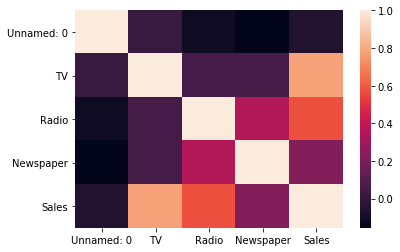

In [28]:
sns.heatmap(data.corr())

# TV to Sales... fairly strong correlation

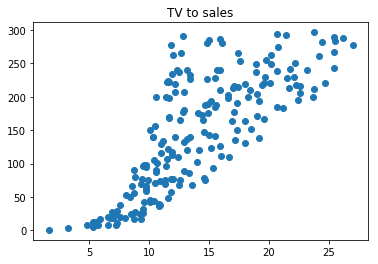

In [29]:
# Sample data.
outcome = data['Sales']
feature = data['TV']

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('TV to sales')
plt.show()


# Radio to sales... Stronger than newspaper, not as strong as TV

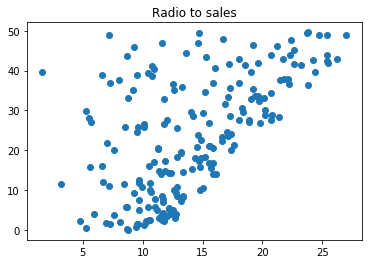

In [30]:
# Sample data.
outcome = data['Sales']
feature = data['Radio']

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Radio to sales')
plt.show()

# Newspaper to Sales... all over the map

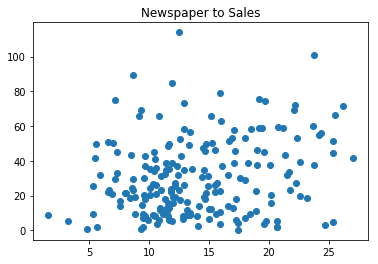

In [31]:
# Sample data.
outcome = data['Sales']
feature = data['Newspaper']

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Newspaper to Sales')
plt.show()

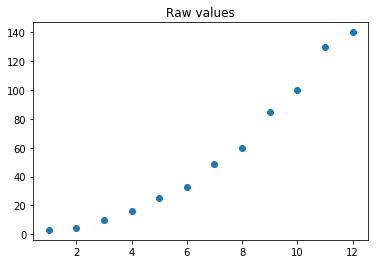

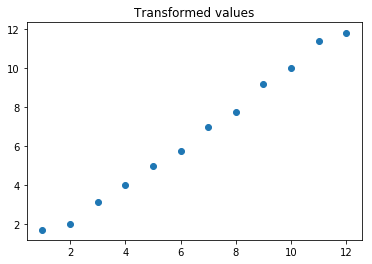

In [4]:
# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in  feature]


# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

In [5]:
type(feature)

list

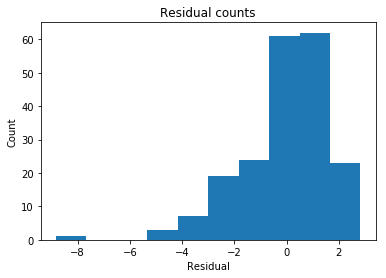

In [6]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

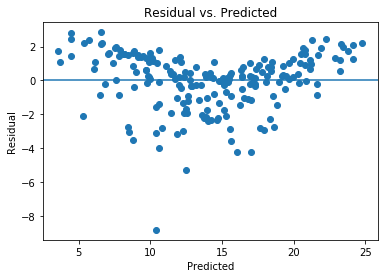

In [7]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

In [8]:
correlation_matrix = X.corr()
display(correlation_matrix)
# One problem is that the radio and newspaper features are highly 

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


In [9]:
# Skewedness in the residual where x is less than or equal to -3, or where there is this great a difference 
# between residual and actual sales

In [18]:
# residual['abs_diff_greater_than_2'] = np.where((abs(residual) > 2),1,0)

In [19]:
# Create a dataframe with residual values all less than 2, get rid of outliers
df = pd.DataFrame(data=residual)

In [20]:
type(df['Sales'])

pandas.core.series.Series

In [21]:
df['abs_diff_greater_than_2'] = np.where((abs(df['Sales']) > 2),1,0)
df['Actual'] = actual
df['Predicted'] = predicted

# Added feature in attempt to fix multivariate non-normality
# Residual absolute difference greater than 2- outliers?

In [22]:

df

,Sales,abs_diff_greater_than_2,Actual,Predicted
0,1.576,0,22.100,20.524
1,-1.938,0,10.400,12.338
2,-3.008,1,9.300,12.308
3,0.902,0,18.500,17.598
4,-0.289,0,12.900,13.189
5,-5.278,1,7.200,12.478
6,0.070,0,11.800,11.730
7,1.077,0,13.200,12.123
8,1.073,0,4.800,3.727
9,-1.951,0,10.600,12.551


In [23]:
# df.loc[df['column_name'] == some_value]
df_abs_res_less_than_two = df.loc[df['abs_diff_greater_than_2'] == 0]

In [24]:
df_abs_res_less_than_two

,Sales,abs_diff_greater_than_2,Actual,Predicted
0,1.576,0,22.100,20.524
1,-1.938,0,10.400,12.338
3,0.902,0,18.500,17.598
4,-0.289,0,12.900,13.189
6,0.070,0,11.800,11.730
7,1.077,0,13.200,12.123
8,1.073,0,4.800,3.727
9,-1.951,0,10.600,12.551
10,1.568,0,8.600,7.032
11,0.115,0,17.400,17.285


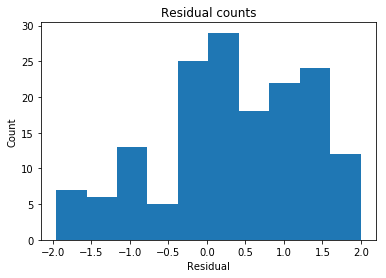

In [25]:
# Extract predicted values.
predicted = df_abs_res_less_than_two['Predicted']
actual = df_abs_res_less_than_two['Actual']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

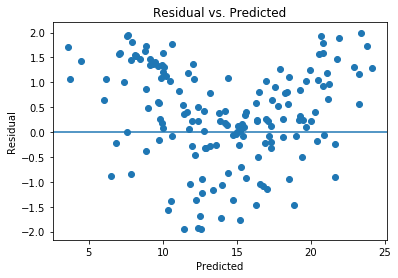

In [26]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Is the above w/ missing outliers? Next data fix addresses the normal curve...

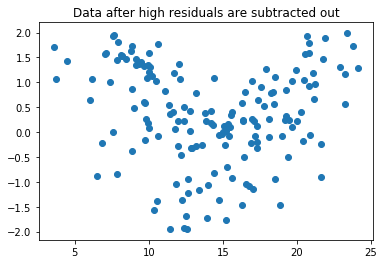

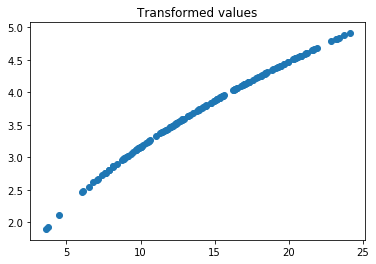

In [27]:
# Plot the data as-is. Looks a mite quadratic.
plt.scatter(predicted, residual)
plt.title('Data after high residuals are subtracted out')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in predicted]


# Well now isn't that nice.
plt.scatter(predicted, sqrt_feature)
plt.title('Transformed values')
plt.show()

# Now, try to adjust data (using either log function or sqrt function) to see if data can be normalized in a way that makes the residual more consistent across the data set

In [50]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)

X_tv = data[['TV','Radio','Newspaper']]
regr.fit(X_tv, Y)

# Inspect the results.
print('\nCoefficients: Sales, TV: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_tv, Y))


Coefficients: Sales, TV: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


# Take the log of tv data

In [53]:
logged_tv = np.log(data['TV'])
squarert_tv = np.sqrt(data['TV'])